Dar uma olhada nesses links:

(grafico de cauda pintado em certas áreas)
https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Continous-Random-Variables/Students-t-Distribution/Students-t-Distribution-in-Python/index.html


# T-Student

### Comparação de duas médias populacionais a partir de duas amostras aleatórias independentes

O teste t para duas amostras independentes é aplicado para comparar as médias de duas amostras aleatórias extraídas da mesma população.



Para um teste bilateral,

$$H_0 : \mu _1 = \mu _2 \\
H_1 : \mu _1 \neq \mu _2$$




Caso 1:

$\sigma^2 _1 \neq \sigma^2 _2$

Variâncias populacionais são diferentes.

Considerando que as variâncias populacionais são diferentes, a estatística T é dada por:

$T_{calc}$ = $\frac{ \bar{X_1}-\bar{X_2} }{\sqrt{\frac{{S_1}^2}{n_1}+\frac{{S_2}^2}{n_2}}}$


Onde:
- $S^2 _1\: e\: S^2 _2$ são as variâncias amostrais
- $n_1 \: e\: n_2$ são os tamanhos das amostras
- $\bar{X_1} \: e\: \bar{X_2}$ são as médias das amostras



In [326]:
import numpy as np
import random
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sympy import latex
rng = np.random.default_rng()

Tabela t student

In [225]:
try:
    t_student_table = pd.read_excel(open('Tabelas.xlsx','rb'),sheet_name='t-Student',header=6)
except Exception as e:
    print("Ocorreu um erro ao ler o arquivo XLSX",e)

In [226]:
t_student_table = t_student_table.dropna(axis=1) #dropa colunas NaN

t_student_table = t_student_table.rename(columns={'Liberdade':'graus_liberdade'})


for c in (t_student_table.columns[1:]):
  t_student_table = t_student_table.rename(columns={c:'alpha = ' + str(c)})

t_student_table

,graus_liberdade,alpha = 0.01,alpha = 0.02,alpha = 0.05,alpha = 0.1,alpha = 0.2
0,1,63.656741,31.820516,12.706205,6.313752,3.077684
1,2,9.924843,6.964557,4.302653,2.919986,1.885618
2,3,5.840909,4.540703,3.182446,2.353363,1.637744
3,4,4.604095,3.746947,2.776445,2.131847,1.533206
4,5,4.032143,3.364930,2.570582,2.015048,1.475884
...,...,...,...,...,...,...
69,400,2.588176,2.335706,1.965912,1.648672,1.283672
70,450,2.586799,2.334663,1.965250,1.648247,1.283436
71,500,2.585698,2.333829,1.964720,1.647907,1.283247
72,1000,2.580755,2.330083,1.962339,1.646379,1.282399


Criação das amostras independentes

Cenário: Fabricação de peças de carro em  2 linhas de produção diferentes


In [227]:
# Coletar dados sobre o tempo de fabricação de peças de carro em 2 linhas de produção diferentes
random.seed(0)
tempo_linha1  = np.random.normal(20,3,20)
tempo_linha2  = np.random.normal(19,4,20)

Estatísticas das amostras para serem utilizadas nas fórmulas de Tcalc e do número de graus de liberdade

In [229]:
def statistics_amostra(amostra):
  return amostra.mean(), amostra.var(), len(amostra)

### Tcalc

In [230]:
def tcalc(amostra1, amostra2):
  X_bar_1, var_amostral_1, n1 = statistics_amostra(amostra1)
  X_bar_2, var_amostral_2, n2 = statistics_amostra(amostra2)


  Tcalc = np.absolute(X_bar_1-X_bar_2)/np.sqrt((var_amostral_1/n1)+(var_amostral_2/n2))

  return Tcalc

In [231]:
tcalc(tempo_linha1,tempo_linha2)

2.0158748203641625

Número de graus de liberdade

In [232]:
def graus_liberdade(amostra1,amostra2):
  var_amostral_1, n1 = statistics_amostra(amostra1)[1:]
  var_amostral_2, n2 = statistics_amostra(amostra2)[1:]

  var_1_sobre_n1, var_2_sobre_n2 =  var_amostral_1/n1, var_amostral_2/n2

  v = np.power(np.sum((var_1_sobre_n1,var_2_sobre_n2)),2)/ ((var_1_sobre_n1)**2/(n1-1) + (var_2_sobre_n2)**2/(n2-1))

  return v

In [233]:
graus_liberdade(tempo_linha1,tempo_linha2)

26.547297145915287

### T_critico (Valor tabelado)

Considerando nível de insignificância $\alpha = 5\%$


In [234]:
def t_critico(amostra1,amostra2):
  v = graus_liberdade(amostra1,amostra2).round()

  t_critico = t_student_table[t_student_table['graus_liberdade'] == int(v)]['alpha = 0.05']
  
  return t_critico.values[0]


In [236]:
t_critico(tempo_linha1,tempo_linha2)

2.051830516480286

Verificação da hipótese

In [237]:
def verify_hipotese(amostra1,amostra2):
    T_crit = t_critico(amostra1, amostra2)
    T_calc = tcalc(amostra1, amostra2)

    if T_calc < T_crit:
        return True #Hipótese nula (H_0) é aceita
    else:
        return False


In [238]:
verify_hipotese(tempo_linha1,tempo_linha2)

True

In [254]:
if verify_hipotese(tempo_linha1,tempo_linha2):
    print('Hipótese nula aceita.')
    print('As médias populacionais são iguais.')

else:
    print('Hipótese nula rejeitada')
    print('As médias populacionais não são iguais.')

Hipótese nula aceita.
As médias populacionais são iguais.


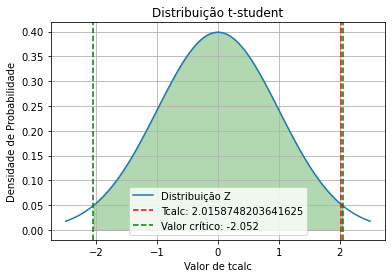

In [402]:
x = np.linspace(-2.5, 2.5, 100)
y = norm.pdf(x)
T_calc = tcalc(tempo_linha1,tempo_linha2)
T_crit =  t_critico(tempo_linha1,tempo_linha2)
regiao = (-T_crit,T_crit)

# Plotando a distribuição Z
plt.plot(x, y, label=f'Distribuição Z')
plt.axvline(T_calc, color='red', linestyle='--', label=f'Tcalc: {T_calc}')
plt.axvline(regiao[0], color='green', linestyle='--', label=f'Valor crítico: {regiao[0]:.3f}')
plt.axvline(regiao[1], color='green', linestyle='--')
plt.fill_between(x, 0, y, where=(x >= regiao[0]) & (x <= regiao[1]), color='green', alpha=0.3)
plt.grid(True)
plt.legend()
plt.title('Distribuição t-student')
plt.xlabel('Valor de tcalc')
plt.ylabel('Densidade de Probabilidade')
plt.show()

### Comparação de duas médias populacionais a partir de duas amostras aleatórias emparelhadas

Pelo teste bilateral,


$$H_0:\mu _d =0, \\
H_1:\mu _d \neq 0.\\
\mu _d = \mu _{antes} - \mu _{depois}$$

Cenário:

Notas de redação antes e depois da preparação de um curso de redação.

In [372]:
#np.random.seed(1)

notas_antes  = stats.norm.rvs(loc=600, scale=100, size=40,random_state=rng)
notas_antes  = notas_antes.round(-1)

notas_depois = (stats.norm.rvs(loc=600, scale=100, size=40,random_state=rng)
                + stats.norm.rvs(scale=0.3, size=40,random_state=rng))
notas_depois = notas_depois.round(-1) 

Criação de dataframe para o nosso teste

In [373]:
data = {'Estudante': [f'Estudante{i+1}' for i in range(len(notas_antes))],
        'X_antes_i': notas_antes.astype(int),  
        'X_depois_i': notas_depois.astype(int)} 

df_emparelhado = pd.DataFrame(data)
df_emparelhado.head()

,Estudante,X_antes_i,X_depois_i
0,Estudante1,640,570
1,Estudante2,520,840
2,Estudante3,750,570
3,Estudante4,760,700
4,Estudante5,670,620


Calculando d_i

In [374]:
df_emparelhado['d_i'] = df_emparelhado['X_antes_i'] - df_emparelhado['X_depois_i']

In [375]:
df_emparelhado.head()

,Estudante,X_antes_i,X_depois_i,d_i
0,Estudante1,640,570,70
1,Estudante2,520,840,-320
2,Estudante3,750,570,180
3,Estudante4,760,700,60
4,Estudante5,670,620,50


In [376]:
def calculate_d_bar(d_i,n):
    d_bar = d_i.mean()
    return d_bar

In [377]:
d_bar = calculate_d_bar(df_emparelhado['d_i'],40)

In [378]:
df_emparelhado['(d_i - d_bar)^2'] = (df_emparelhado['d_i'] - d_bar)**2

In [379]:
df_emparelhado.head()

,Estudante,X_antes_i,X_depois_i,d_i,(d_i - d_bar)^2
0,Estudante1,640,570,70,2601.0
1,Estudante2,520,840,-320,114921.0
2,Estudante3,750,570,180,25921.0
3,Estudante4,760,700,60,1681.0
4,Estudante5,670,620,50,961.0


In [380]:
Sd = np.sqrt((df_emparelhado['(d_i - d_bar)^2'].sum())/(40-1))

In [381]:
def tcalc_emp(df, d_bar, Sd, n):
    Tcalc = (d_bar -( df['X_antes_i'].mean() - df['X_depois_i'].mean())) / (Sd/np.sqrt(n))

    return Tcalc

Número de graus de liberdade

$v = n - 1$

### T_critico (Valor tabelado)

Considerando nível de insignificância $\alpha = 5\%$

In [383]:
def t_critic_emp(df):
    n = len(df)

    v= n-1

    t_critico_emp = t_student_table[t_student_table['graus_liberdade'] == int(v)]['alpha = 0.05']

    return t_critico_emp.values[0]


In [384]:
t_critic_emp(df_emparelhado)

2.0226909200367595

In [385]:
def verify_hipotese_emp(df, d_bar, Sd):
    
    n = len(df)

    
    T_crit = t_critic_emp(df)
    T_calc = tcalc_emp(df, d_bar, Sd, n)


    print(T_calc)
    if T_calc < T_crit:
        return True #Hipótese nula (H_0) é aceita
    else:
        return False


In [386]:
if verify_hipotese_emp(df_emparelhado,d_bar,Sd):
    print('Hipótese nula aceita.')
    print('As médias populacionais não são significativamente diferentes.')

else:
    print('Hipótese nula rejeitada')
    print('As médias populacionais são significativamente diferentes.')


0.0
Hipótese nula aceita.
As médias populacionais não são significativamente diferentes.


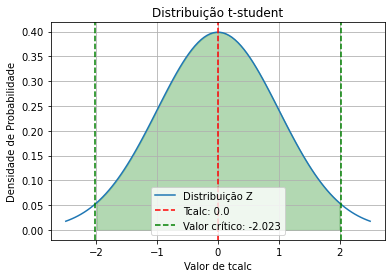

In [406]:
x = np.linspace(-2.5, 2.5, 100)
y = norm.pdf(x)
T_calc = tcalc_emp(df_emparelhado, d_bar, Sd, 40)
T_crit =  t_critic_emp(df_emparelhado)
regiao = (-T_crit,T_crit)

# Plotando a distribuição Z
plt.plot(x, y, label=f'Distribuição Z')
plt.axvline(T_calc, color='red', linestyle='--', label=f'Tcalc: {T_calc}')
plt.axvline(regiao[0], color='green', linestyle='--', label=f'Valor crítico: {regiao[0]:.3f}')
plt.axvline(regiao[1], color='green', linestyle='--')
plt.fill_between(x, 0, y, where=(x >= regiao[0]) & (x <= regiao[1]), color='green', alpha=0.3)
plt.grid(True)
plt.legend()
plt.title('Distribuição t-student')
plt.xlabel('Valor de tcalc')
plt.ylabel('Densidade de Probabilidade')
plt.show()